In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import patchify
from scipy.ndimage import rotate
from PIL import Image
import os

In [2]:
OutDIR='/DATA/vito/output/'
DataDIR='/DATA/vito/data/'

image=(np.load(DataDIR+'example/rgb.npy')*255).astype(np.uint8)
masks=np.load(OutDIR+'testing/Aggregate_masks_noedge_nms_voidreseg.npy')

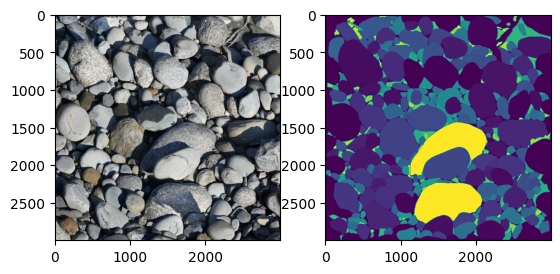

In [3]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(masks)

In [4]:
binary_mask=masks!=0

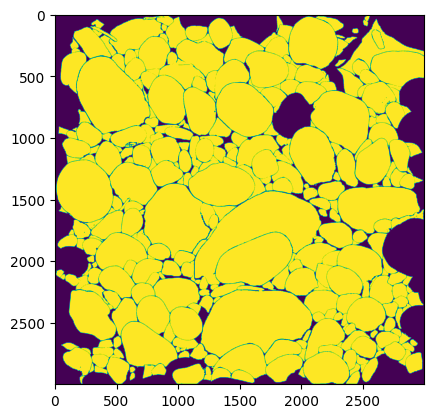

In [5]:
plt.imshow(binary_mask)

In [13]:
crop_size=512
pty_img = patchify.patchify(image, (crop_size,crop_size,image.shape[-1]), step=crop_size)
pty_msk = patchify.patchify(binary_mask, (crop_size,crop_size), step=crop_size)
print(pty_img.shape, pty_msk.shape)

(5, 5, 1, 512, 512, 3) (5, 5, 512, 512)


In [14]:
pty_img=pty_img.reshape(pty_img.shape[0]*pty_img.shape[1],pty_img.shape[3],pty_img.shape[4],pty_img.shape[5])
pty_msk=pty_msk.reshape(pty_msk.shape[0]*pty_msk.shape[1],pty_msk.shape[2],pty_msk.shape[3])
print(pty_img.shape, pty_msk.shape)

(25, 512, 512, 3) (25, 512, 512)


In [19]:
val_ind=(np.random.random(5)*25).astype(int)

In [23]:
2 in val_ind

True

In [25]:
img_pth='/DATA/vito/U-KAN/Seg_UKAN/inputs/CVC-ClinicDB/images/'
msk_pth='/DATA/vito/U-KAN/Seg_UKAN/inputs/CVC-ClinicDB/masks/0/'
val_img='/DATA/vito/U-KAN/Seg_UKAN/inputs/CVC-ClinicDB/images_val/'
val_msk='/DATA/vito/U-KAN/Seg_UKAN/inputs/CVC-ClinicDB/masks_val/0/'
for dir in [img_pth,msk_pth,val_img,val_msk]:
    if not os.path.exists(dir[:-1]):
        os.makedirs(dir[:-1])
print(val_ind)

count=0
count_val=0
for i in range(pty_img.shape[0]):
    if not i in val_ind:
        im = Image.fromarray(pty_img[i])
        im.save(img_pth+f"{count}.png")
        #np.save(f"/DATA/vito/U-KAN/Seg_UKAN/inputs/SAMout/images/{i}{j}",pty_img[i,j,0])
        im = Image.fromarray(pty_msk[i])
        im.save(msk_pth+f"{count}.png")
        #np.save(f"/DATA/vito/U-KAN/Seg_UKAN/inputs/SAMout/masks/0/{i}{j}_mask",pty_msk[i,j])
        count+=1
    else:
        im = Image.fromarray(pty_img[i])
        im.save(val_img+f"{count_val}.png")
        #np.save(f"/DATA/vito/U-KAN/Seg_UKAN/inputs/SAMout/images/{i}{j}",pty_img[i,j,0])
        im = Image.fromarray(pty_msk[i])
        im.save(val_msk+f"{count_val}.png")
        #np.save(f"/DATA/vito/U-KAN/Seg_UKAN/inputs/SAMout/masks/0/{i}{j}_mask",pty_msk[i,j])
        count_val+=1


[ 2 19 22 15 10]


In [9]:
patchable_Y=crop_size*(image.shape[0]//crop_size)
patchable_X=crop_size*(image.shape[1]//crop_size)

In [10]:
reconstructed_image = patchify.unpatchify(pty_img, (patchable_Y,patchable_X,image.shape[-1]))


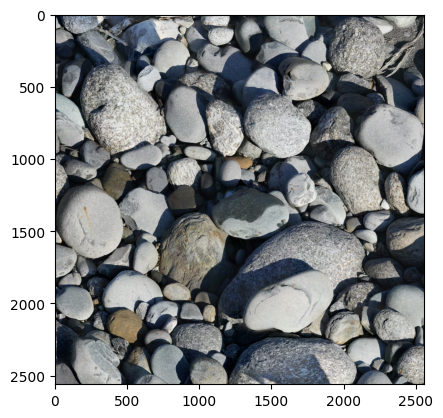

(2560, 2560, 3)

In [11]:
plt.imshow(reconstructed_image)
plt.show()
reconstructed_image.shape